# Análisis de las instituciones educativas de los Estados Unidos.
## Autores:
- Valentina Vanegas Castaño.
- Edwar Jose Londoño Correa.
- Andres Castrillón Velasquez.
- Diego Andres Chavarría Riaño.
- Sebastian Rendón Arteaga.

# Contexto del Problema

El Departamento de Educación de los Estados Unidos pone a disposición del público información para tomar mejores decisiones en la elección de instituciones de educación. Esta información se encuentra almacenada en el dataset “CollegeScorecard.csv”, publicado en el año 2016, las observaciones corresponden a la información de las diferentes instituciones educativas de dicho país y el dataset  se compone de 7804 observaciones y 1725 variables.
El objetivo de este proyecto es identificar dentro del dataset  si existen grupos de observaciones que contengan similitud con base a las categorías con las que se van a trabajar.

### Importación de las librerias.

In [1]:
# Se importa las librerias necesarias para la elaboración del proyecto.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sb
from yellowbrick.cluster import KElbowVisualizer
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.figure_factory as ff
from plotly.figure_factory import create_dendrogram
from sklearn.preprocessing import MinMaxScaler

### Carga de la base de datos.

In [2]:
# Se cargan los datos. 
CollegeScoreCard=pd.read_csv('CollegeScorecard.csv', sep=',', encoding = 'utf-8')
# Cantidad de datos y número de variables
CollegeScoreCard.shape

C:\Users\Edwar\AppData\Local\Temp\ipykernel_8464\1466162896.py:2: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types. Specify dtype option on import or set low_memory=False.
  CollegeScoreCard=pd.read_csv('CollegeScorecard.csv', sep=',', encoding = 'utf-8')


(7804, 1725)

### Depuración de los datos.

Para la depuración inicial de la base de datos se tomaron en cuenta las instituciones que están operando actualmente y que sean solamente presenciales. Luego seleccionamos las variables que queremos tomar en cuenta en nuestro estudio:

- Nombre de institución.
- Tipo_de_Entidad: Tipo de institución (Public, private nonprofit, private for-profit).
- Costo_Anual_Estudio: costo anual de estudio.
- Becados_Pell: porcentaje de estudiantes con beca "PELL".
- Estudiantes_Mayor_25: porcentaje de estudiantes mayores a 25 años.
- GananciaEstudiante: Ganancia de la universidad por estudiante.

Luego, se procedió a revisar los valores nulos de las variables seleccionadas y se eliminaron los valores nulos debido a que no tienen una gran representación en la base de datos.


Para la depuración inicial de la base de datos se tomaron en cuenta las instituciones que están operando actualmente y que sean solamente presenciales. Luego seleccionamos las variables que queremos tomar en cuenta en nuestro estudio:
- Nombre de institución.
- Tipo de institución (Public, private nonprofit, private for-profit).
- Costo anual de estudio.
- Porcentaje de estudiantes con beca "PELL".
- Porcentaje de estudiantes mayores a 25 años.
- Porcentaje de diplomas entregados en diferentes areas del conocimiento (Computer Science, Engineering, Linguistics, Biological Science, Mathematics, Psychology, Business)

Luego procedemos a revisar los valores nulos de las variables seleccionadas y se eliminan los valores nulos debido a que no tienen una gran representación en la base de datos.

In [3]:
# data[data['INSTNM'].str.contains('niversity') & data["COSTT4_P"].notnull()]
# data[~data['INSTNM'].str.contains('niversity') & ~data['INSTNM'].str.contains('ollege') & ~data['INSTNM'].str.contains('nstitu')]
# data[data['INSTNM'].str.contains('niversity') | data['INSTNM'].str.contains('ollege') | data['INSTNM'].str.contains('nstitu') | data['INSTNM'].str.contains('chool') | data['INSTNM'].str.contains('enter')]
# data[~data['INSTNM'].str.contains('niversity') & ~data['INSTNM'].str.contains('ollege') & ~data['INSTNM'].str.contains('nstitu') & ~data['INSTNM'].str.contains('chool') & ~data['INSTNM'].str.contains('enter')]
# data[~data['INSTNM'].str.contains('niversity') & ~data['INSTNM'].str.contains('ollege') & ~data['INSTNM'].str.contains('nstitu') & ~data['INSTNM'].str.contains('chool') & ~data['INSTNM'].str.contains('enter') & ~data['INSTNM'].str.contains('cadem')]
# data[~data['INSTNM'].str.contains('niversity') & ~data['INSTNM'].str.contains('ollege') & ~data['INSTNM'].str.contains('nstitu') & ~data['INSTNM'].str.contains('chool') & ~data['INSTNM'].str.contains('enter') & ~data['INSTNM'].str.contains('cadem')  & ~data['INSTNM'].str.contains('CET')]
# data[data['INSTNM'].str.contains('niversity') | data['INSTNM'].str.contains('ollege') | data['INSTNM'].str.contains('nstitu') ]

In [4]:
# Función para transformar la variable "CONTROL" de numérica a categórica

def trans_variable_control(p):
    p_mod=''
    if p == 1:
        return "PUBLIC"
    elif p == 2:
        return "PRIVATE NONPROFIT"
    else:
        return "PRIVATE FOR-PROFIT"

In [5]:
# Depuracion y eleccion de variables
data=CollegeScoreCard[CollegeScoreCard["CURROPER"]!=0]
data=data[data["DISTANCEONLY"]!=1]
#data=data[["INSTNM","CONTROL","COSTT4_A","COSTT4_P","PCTPELL","UG25abv","PCIP11","PCIP14","PCIP16","PCIP26","PCIP27","PCIP42","PCIP52"]]
data=data[["INSTNM","CONTROL","COSTT4_A","COSTT4_P","PCTPELL","UG25abv","TUITFTE"]]
data=data[data["COSTT4_A"].notnull() | data["COSTT4_P"].notnull()]
data=data[data['INSTNM'].str.contains('niversity') | data['INSTNM'].str.contains('ollege') | data['INSTNM'].str.contains('nstitu') ]
data=data[data["COSTT4_A"].notnull()]
data=data[data['UG25abv'].notnull()]
data=data.drop(['COSTT4_P'],axis=1)
data["CONTROL"]=data["CONTROL"].apply(trans_variable_control)
data=data.drop([2124])

In [7]:
# Se renombran todas las variables
# data=data.rename(columns={'CONTROL': 'Tipo_de_Entidad','COSTT4_A': 'Costo_Anual_Estudio','PCTPELL': 'Becados_Pell','UG25abv': 'Estudiantes_Mayor_25','PCIP11': 'Computer_Science', 'PCIP14': 'Engineering','PCIP16': 'Linguistics', 'PCIP26': 'Biological_Science','PCIP27': 'Mathematics','PCIP42': 'Psychology','PCIP52': 'Business'})
data=data.rename(columns={'CONTROL': 'Tipo_de_Entidad','COSTT4_A': 'Costo_Anual_Estudio','PCTPELL': 'Becados_Pell','UG25abv': 'Estudiantes_Mayor_25','TUITFTE':'GananciaEstudiante'})

In [8]:
data['Tipo_de_Entidad'].value_counts()

PUBLIC                1584
PRIVATE NONPROFIT     1259
PRIVATE FOR-PROFIT     904
Name: Tipo_de_Entidad, dtype: int64

### Normalización de las variables

Se normaliza la base de datos convirtiendo las variables categóricas en "dummies", se normalizan las variables de tipo numérica para transformarlas a escala de [0,1], y se elimina la variable **"INSTNM"** para poder crear el modelo de agrupamiento.

In [9]:
#Se transforma la variable "Tipo_de_Entidad" en variables dummies
data= pd.get_dummies(data, columns=['Tipo_de_Entidad'])

In [12]:
#Se crea una copia del dataframe data.
ies=data

In [13]:
#Se elimina la columna "INSTNM" y esta se guarda en la variable "nombresIes"
nombresIes=ies['INSTNM']
ies=ies.drop(['INSTNM'],axis=1)

In [25]:
# Se crea una copia del dataframe "ies"
norm_ies = ies.copy()
  
# Se aplica la técnica de normalización en las variables "Costo_Anual_Estudio" y "GananciaEstudiante"
column = 'Costo_Anual_Estudio'
column2= 'GananciaEstudiante'
norm_ies[column] = MinMaxScaler().fit_transform(np.array(norm_ies[column]).reshape(-1,1))
norm_ies[column2] = MinMaxScaler().fit_transform(np.array(norm_ies[column2]).reshape(-1,1))

In [10]:
# Se visualiza el dataframe
norm_ies.head()

,INSTNM,Costo_Anual_Estudio,Becados_Pell,Estudiantes_Mayor_25,GananciaEstudiante,Tipo_de_Entidad_PRIVATE FOR-PROFIT,Tipo_de_Entidad_PRIVATE NONPROFIT,Tipo_de_Entidad_PUBLIC
0,Alabama A & M University,18888.0,0.7115,0.1049,9063.0,0,0,1
1,University of Alabama at Birmingham,19990.0,0.3505,0.2422,9033.0,0,0,1
2,Amridge University,12300.0,0.6839,0.8540,12057.0,0,1,0
3,University of Alabama in Huntsville,20306.0,0.3281,0.2640,8322.0,0,0,1
4,Alabama State University,17400.0,0.8265,0.1270,7813.0,0,0,1


### Correlación de las variables

Se analiza el grado de correlación existente entre las variables con las que se esta trabajando.

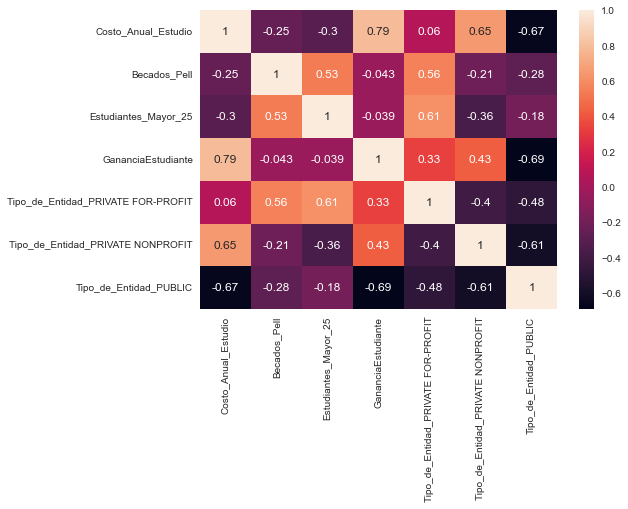

In [15]:
# Se crea y se grafica la matriz de correlación
IescorrMatrix = norm_ies.corr()
sb.heatmap(IescorrMatrix, annot=True)
plt.show()

Se puede observar que la correlación mas significativa es entre las variables "Costo_Anual_Estudio" y "GananciaEstudiante"  que tiene un valor de 0.79.

### Creación el modelo de agrupamiento.

Para el proyecto, se utilizará el metodo **K-Means**. Para esto primero se utilizará el método **Codo** para poder identificar el número óptimo de clusters. Ya luego se procede a la creación de los clusters.

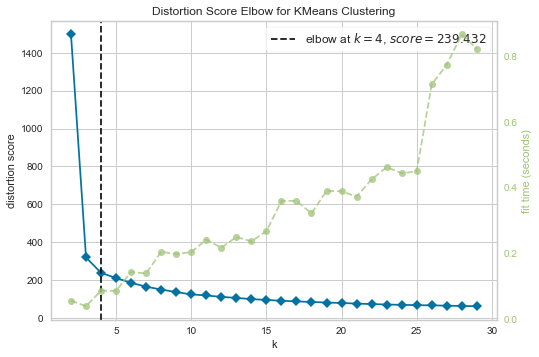

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
#Se analiza el número óptimo de clusters

modelIes = KMeans()
visualizer = KElbowVisualizer(modelIes, k=(2,30), timings= True)
Iesfit=norm_ies.sample(int(len(norm_ies)*1))
visualizer.fit(Iesfit)        
visualizer.show() 

Al realizar el método del codo encontramos que el número óptimo de clusters es 4.

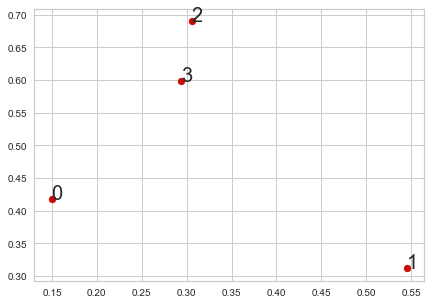

In [17]:
# Se crea el modelo usando K-Means, y se grafican sus centroides
kmeans_model_2D = KMeans(n_clusters=4, max_iter=1000).fit(Iesfit)
labels_2D = kmeans_model_2D.labels_
centroids_2D = kmeans_model_2D.cluster_centers_
fig, ax = plt.subplots(figsize=(7, 5))

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', marker='o')

for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=20)

In [24]:
#Se crean los grupos de acuerdo a la clasificación obtenida
ies['Nombre Universidad']=nombresIes
ies['Clasificacion']=labels_2D
ies['Clasificacion'].value_counts()

grupo0=ies[ies['Clasificacion']==0]
grupo1=ies[ies['Clasificacion']==1]
grupo2=ies[ies['Clasificacion']==2]
grupo3=ies[ies['Clasificacion']==3]

#Se crea el dataframa df el cual contiene la media todas las variables por grupo
df=pd.DataFrame()
df['grupo0']=grupo0.mean()
df['grupo1']=grupo1.mean()
df['grupo2']=grupo2.mean()
df['grupo3']=grupo3.mean()

#Se visualiza el data frame df
df

C:\Users\Edwar\AppData\Local\Temp\ipykernel_8464\1901947215.py:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Edwar\AppData\Local\Temp\ipykernel_8464\1901947215.py:12: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Edwar\AppData\Local\Temp\ipykernel_8464\1901947215.py:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\Edwar\AppData\Local\Temp\ipykernel_8464\1901947215.py:14: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_

,grupo0,grupo1,grupo2,grupo3
Costo_Anual_Estudio,24482.160354,23538.928105,24472.324115,24885.874494
Becados_Pell,0.484855,0.493688,0.480886,0.481709
Estudiantes_Mayor_25,0.356908,0.368724,0.356281,0.372206
GananciaEstudiante,9912.539141,9580.312418,10038.730088,10358.038462
Tipo_de_Entidad_PRIVATE FOR-PROFIT,0.233586,0.241830,0.243363,0.261134
Tipo_de_Entidad_PRIVATE NONPROFIT,0.339015,0.329412,0.331858,0.344130
Tipo_de_Entidad_PUBLIC,0.427399,0.428758,0.424779,0.394737
Clasificacion,0.000000,1.000000,2.000000,3.000000


In [20]:
#Se grafica un box-plots

# dict for the dataframes and their names
dfs = {"grupo0" : grupo0, "grupo1": grupo1, "grupo2" : grupo2}

# plot the data
fig = go.Figure()

for i in dfs:
    fig = fig.add_trace(go.Box(y = dfs[i]["Costo_Anual_Estudio"], 
                                   name = i))
fig.show()

### Conclusión

### Propuesta

### Refencias